In [1]:
import torch
from torch.utils.data import DataLoader

from modeling.networks.dataset.quora_dataset import QuoraDataset
from modeling.networks.quora_dupliate_lstm import QuoraLstmDuplicateClassifier
from modeling.networks.train.train_model import train_model
from modeling.networks.utils.loader import save_model_state

%load_ext autoreload
%autoreload 2

In [2]:
embedding_matrix = torch.load("../registry/embeddings/embedding_matrix.pt")

In [3]:
use_gpu = True
DEVICE = "cuda" if use_gpu else "cpu"
DEVICE

'cuda'

In [4]:
data_train = torch.load("../registry/datasets/quora_train_dataset.pt")
X_q1_train = data_train["X_q1"]
X_q2_train = data_train["X_q2"]
y_train = data_train["y"]

In [5]:
y_train.shape

torch.Size([323432])

In [6]:
data_test = torch.load("../registry/datasets/quora_test_dataset.pt")
X_q1_test = data_test["X_q1"]
X_q2_test = data_test["X_q2"]
y_test = data_test["y"]

In [7]:
y_test.shape

torch.Size([80858])

In [8]:
model = QuoraLstmDuplicateClassifier(embedding_matrix, hidden_size=100)
X_q1_batch = X_q1_train[:32]
X_q2_batch = X_q2_train[:32]

output = model(X_q1_batch, X_q2_batch)
print(output.shape)

torch.Size([32])


In [9]:
train_dataset = QuoraDataset(X_q1_train, X_q2_train, y_train)
val_dataset = QuoraDataset(X_q1_test, X_q2_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

Using device: cuda


Training: 100%|██████████ [Elapsed: 04:06 | Remaining: 00:00]



|Epoch 1/10| Train Loss: 0.4988; Val Loss: 0.4893; Val F1: 0.5613


Training: 100%|██████████ [Elapsed: 04:07 | Remaining: 00:00]



|Epoch 2/10| Train Loss: 0.4177; Val Loss: 0.4679; Val F1: 0.6307


Training: 100%|██████████ [Elapsed: 04:06 | Remaining: 00:00]



|Epoch 3/10| Train Loss: 0.3446; Val Loss: 0.4929; Val F1: 0.6655


Training: 100%|██████████ [Elapsed: 04:07 | Remaining: 00:00]



|Epoch 4/10| Train Loss: 0.2740; Val Loss: 0.5557; Val F1: 0.6841


Training: 100%|██████████ [Elapsed: 04:12 | Remaining: 00:00]



|Epoch 5/10| Train Loss: 0.2132; Val Loss: 0.6114; Val F1: 0.6851


Training: 100%|██████████ [Elapsed: 04:03 | Remaining: 00:00]



|Epoch 6/10| Train Loss: 0.1670; Val Loss: 0.7113; Val F1: 0.6908


Training: 100%|██████████ [Elapsed: 04:02 | Remaining: 00:00]



|Epoch 7/10| Train Loss: 0.1333; Val Loss: 0.8321; Val F1: 0.6941


Training: 100%|██████████ [Elapsed: 04:02 | Remaining: 00:00]



|Epoch 8/10| Train Loss: 0.1095; Val Loss: 0.8995; Val F1: 0.6966


Training: 100%|██████████ [Elapsed: 04:03 | Remaining: 00:00]



|Epoch 9/10| Train Loss: 0.0926; Val Loss: 1.0407; Val F1: 0.6923
EarlyStopping patience: 1/3


Training: 100%|██████████ [Elapsed: 04:03 | Remaining: 00:00]



|Epoch 10/10| Train Loss: 0.0808; Val Loss: 1.1265; Val F1: 0.6989

Best Val F1: 0.6989


          Model Evaluation Metrics           
┏━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Train Value ┃ Validation Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ f1_score │      0.9535 │           0.6989 │
│ roc_auc  │      0.9957 │           0.8383 │
└──────────┴─────────────┴──────────────────┘

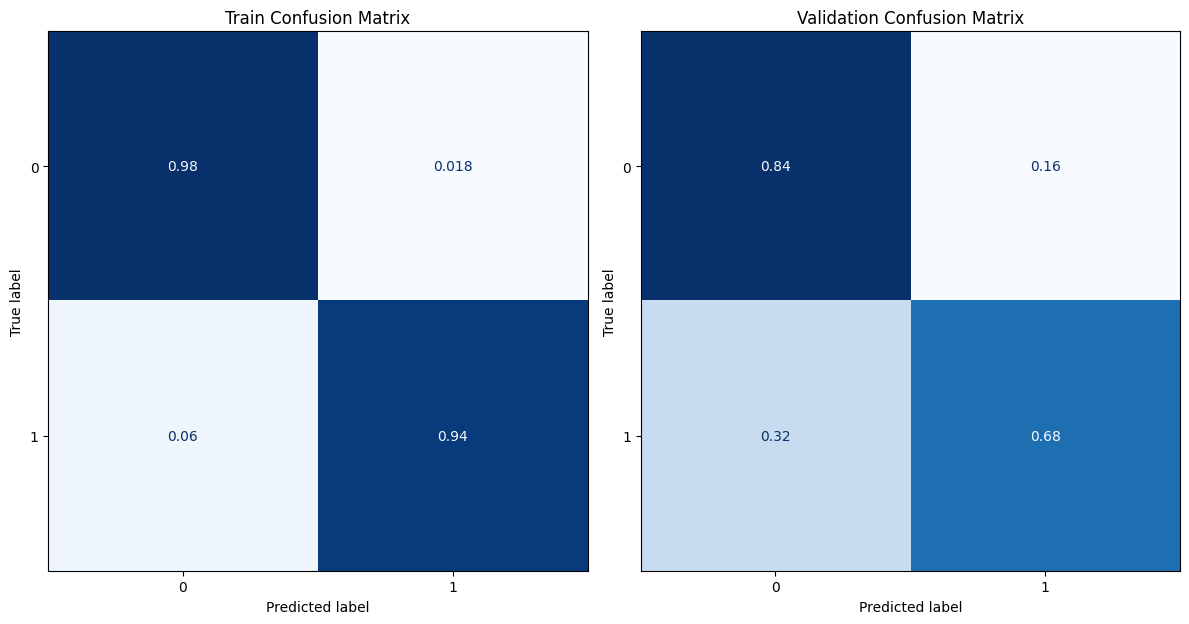

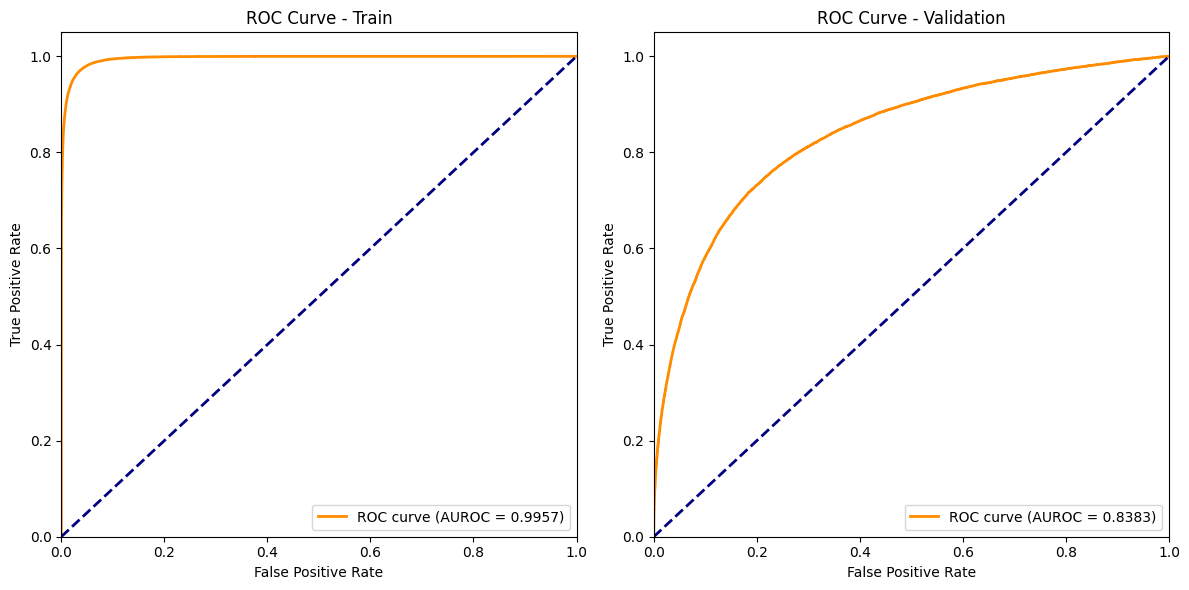

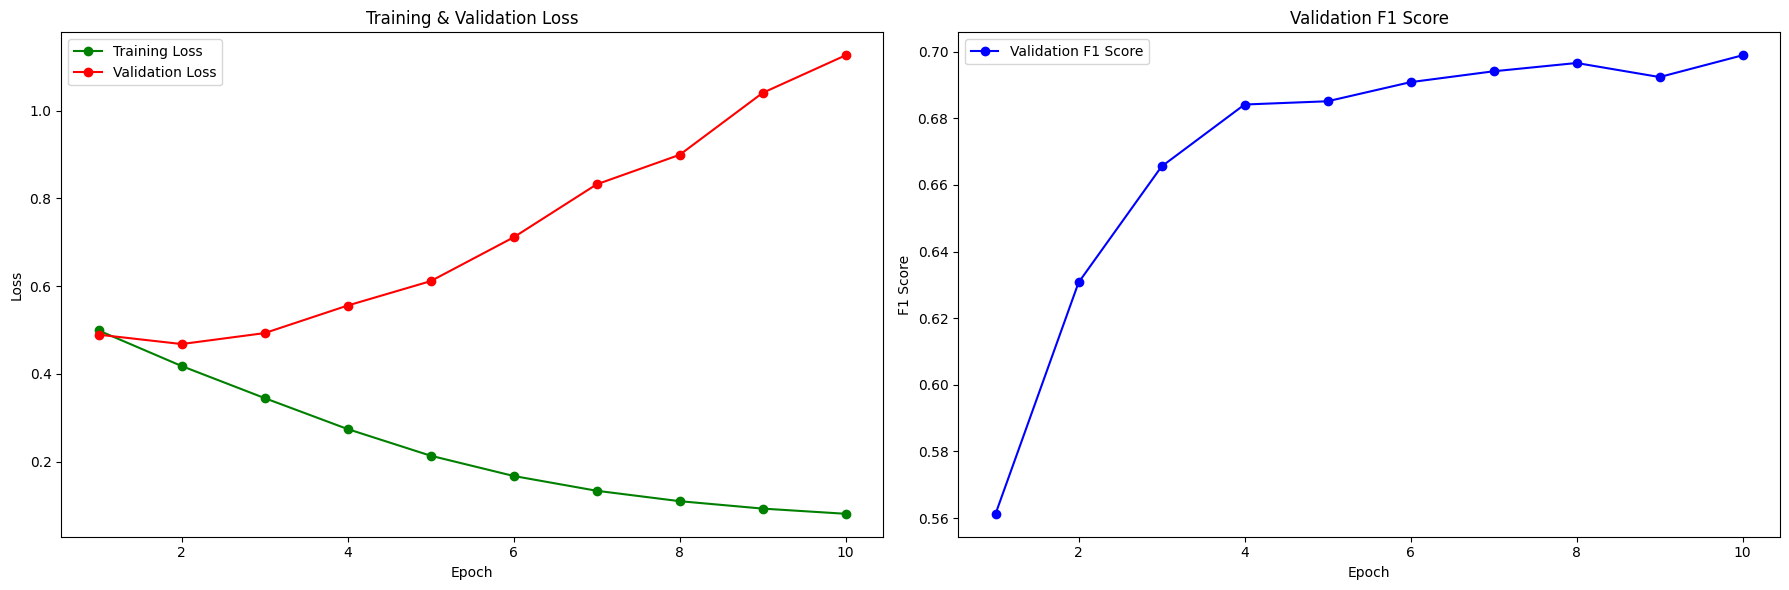

(QuoraLstmDuplicateClassifier(
   (embedding): Embedding(50000, 300, padding_idx=0)
   (q1_encoder): LSTM(300, 100, batch_first=True, bidirectional=True)
   (q2_encoder): LSTM(300, 100, batch_first=True, bidirectional=True)
   (dropout): Dropout(p=0.3, inplace=False)
   (fc): Linear(in_features=400, out_features=1, bias=True)
 ),
 {'train_loss': [0.49880806124040533,
   0.41774788645855704,
   0.3446083288716442,
   0.27396802261871994,
   0.21322047924656062,
   0.16698954821718864,
   0.133277200064515,
   0.10953554892895923,
   0.09261093830911515,
   0.08076929540964238],
  'val_loss': [0.4892541872190778,
   0.46787141390855386,
   0.49285954241112,
   0.5557114301926778,
   0.6113553587472575,
   0.7113013722247222,
   0.8320993675581659,
   0.8994547373688546,
   1.040708692522508,
   1.1264510811536879],
  'val_f1': [0.5613037541134069,
   0.6307115794704043,
   0.6655209452201933,
   0.6841110519845129,
   0.6850868769590347,
   0.6908229763897297,
   0.6940813680484984,
   0

In [10]:
train_model(model, train_loader, val_loader, num_epochs=10, device=DEVICE)

In [11]:
save_model_state(model, path="../registry/models/lstm/lstm_model.pt")

Model state_dict saved to: C:\Users\altsh\PycharmProjects\duplicate_question_classifier_assigment\registry\models\lstm\lstm_model.pt
